In [62]:
%matplotlib notebook
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as stats
import datetime
from pandas.tools.plotting import table

In [63]:
#import the data
file_path = "Result/Daily_weather_and_collision_2016.csv"
collision_2016 = pd.DataFrame(pd.read_csv(file_path))
collision_2016.head()

,Date,Temp High,Temp Low,Rain level (inches),Collision Count
0,1/1/2016,64.34,46.96,0.000,137
1,1/2/2016,64.67,46.02,0.000,97
2,1/3/2016,61.68,54.76,0.000,101
3,1/4/2016,67.59,55.12,0.001,122
4,1/5/2016,56.98,47.89,1.173,128


In [64]:
#cut bins to seperate into several groups
bins=[0,65,70,75,80,85,90,200]
group_names = ["<65","[65,70)","[70,75)","[75,80)","[80,85)","[85,90)",">=90"]
collision_2016["Temp Group"]=pd.cut(collision_2016["Temp High"],bins,labels=group_names)
collision_2016.head()

,Date,Temp High,Temp Low,Rain level (inches),Collision Count,Temp Group
0,1/1/2016,64.34,46.96,0.000,137,<65
1,1/2/2016,64.67,46.02,0.000,97,<65
2,1/3/2016,61.68,54.76,0.000,101,<65
3,1/4/2016,67.59,55.12,0.001,122,"[65,70)"
4,1/5/2016,56.98,47.89,1.173,128,<65


In [65]:
#create list for each temperature group for later T-test
collision_less65=collision_2016[collision_2016["Temp Group"]=="<65"]
collision_65to70=collision_2016[collision_2016["Temp Group"]=="[65,70)"]
collision_70to75=collision_2016[collision_2016["Temp Group"]=="[70,75)"]
collision_75to80=collision_2016[collision_2016["Temp Group"]=="[75,80)"]
collision_80to85=collision_2016[collision_2016["Temp Group"]=="[80,85)"]
collision_85to90=collision_2016[collision_2016["Temp Group"]=="[85,90)"]
collision_more90=collision_2016[collision_2016["Temp Group"]==">=90"]

In [66]:
collision_mean = pd.DataFrame(collision_2016.groupby("Temp Group")["Collision Count"].mean()).reset_index()
collision_mean

,Temp Group,Collision Count
0,<65,142.916667
1,"[65,70)",154.750000
2,"[70,75)",152.500000
3,"[75,80)",153.196970
4,"[80,85)",157.017857
5,"[85,90)",160.363636
6,>=90,162.894737


<IPython.core.display.Javascript object>


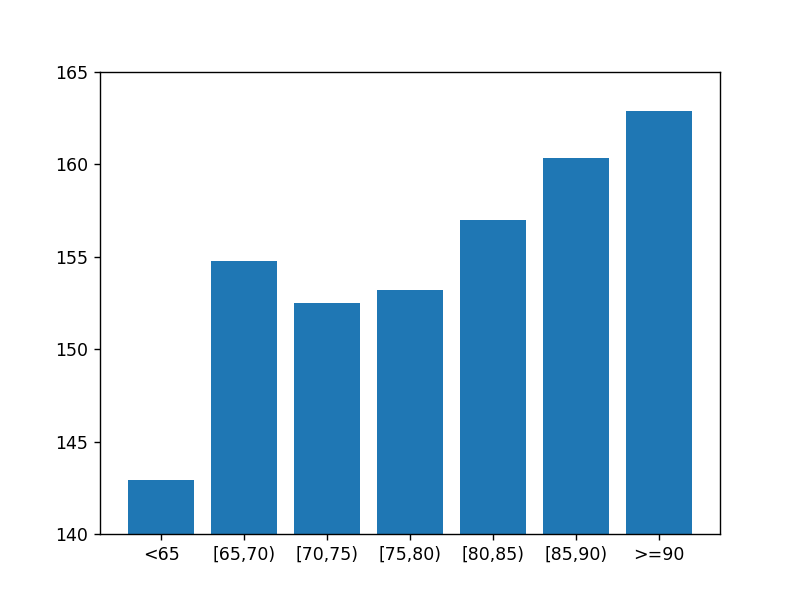

In [68]:
plt.bar(collision_mean["Temp Group"],collision_mean["Collision Count"])
plt.ylim(140,165)
plt.savefig("Result/temp_barchart.png")
plt.show()

In [43]:
temp_list=[collision_less65["Collision Count"],collision_65to70["Collision Count"],collision_70to75["Collision Count"]\
           ,collision_75to80["Collision Count"],collision_80to85["Collision Count"],collision_85to90["Collision Count"]\
           ,collision_more90["Collision Count"]]


<IPython.core.display.Javascript object>


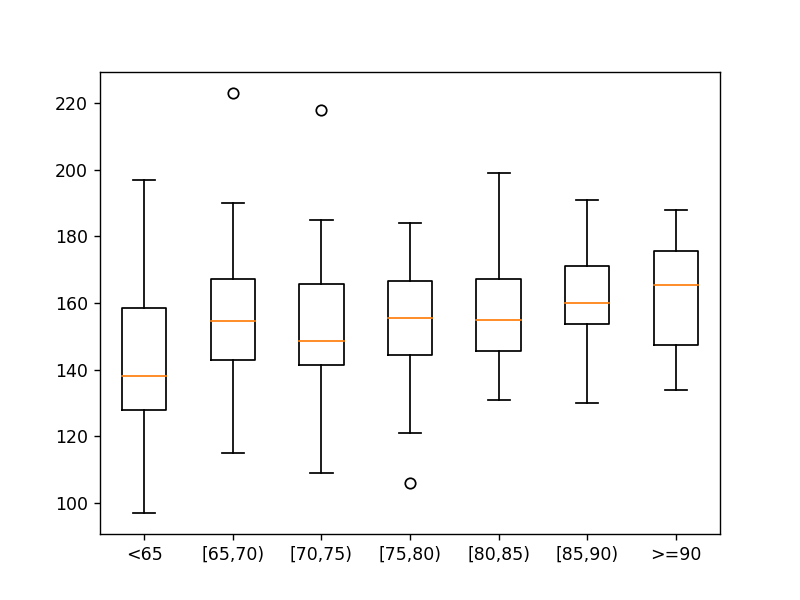

In [69]:
plt.boxplot(temp_list,labels=collision_mean["Temp Group"])
plt.savefig("Result/temp_boxchart.png")
plt.show()

In [58]:
#runing T-test for lowest temp group
population_list = collision_2016["Collision Count"]
sample1=collision_less65["Collision Count"]

In [59]:
stats.ttest_1samp(sample1,population_list.mean())

Ttest_1sampResult(statistic=-3.4313795074356666, pvalue=0.0012614248935393297)

In [61]:
#runing T-test for highest temp group
sample2=collision_more90["Collision Count"]
stats.ttest_1samp(sample2,population_list.mean())

Ttest_1sampResult(statistic=3.3740305714198704, pvalue=0.001749731266063906)